CREDIT CARDV DATASET FOR CLUSTERING

In this checkpoint, i am going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link 

https://i.imgur.com/gAT5gVg.jpg

Columns explanation : 

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account 
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user 
PAYMENTS: Amount of Payment done by user 

Instructions

Import you data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
Perform partitional clustering using the K-means algorithm. Then, plot the clusters
Find the best k value and plot the clusters again.
Interpret the results

CLUSTERING CHECKPOINT

In [2]:
#Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

## Loading the dataset

In [8]:
credit_df = pd.read_csv(r"C:\Users\Zione\Downloads\Credit_card_dataset.csv")

## Basic exploratory phases

In [9]:
credit_df.head()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


There is no categorical column to encode.

In [11]:
credit_df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [13]:
credit_df.shape

(8950, 6)

## Checking for missing values, duplicates or Outliers

In [14]:
credit_df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [15]:
credit_df.dropna()

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [16]:
## Extracting the important features
X = credit_df[["PURCHASES", "CREDIT_LIMIT"]]

In [18]:
#Feature Scaling
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [22]:
# Hierarchical clustering
linked = linkage(X_scaled,'ward')

In [23]:
import numpy as np

# Checking for NaN and infinite values
if np.any(np.isnan(X_scaled)) or np.any(np.isinf(X_scaled)):
    print("There are NaN or infinite values in the data")
    # Handle the NaN or infinite values, e.g., by removing or imputing them
    X_scaled = np.nan_to_num(X_scaled)

# Now applying the linkage function
linked = linkage(X_scaled, 'ward')


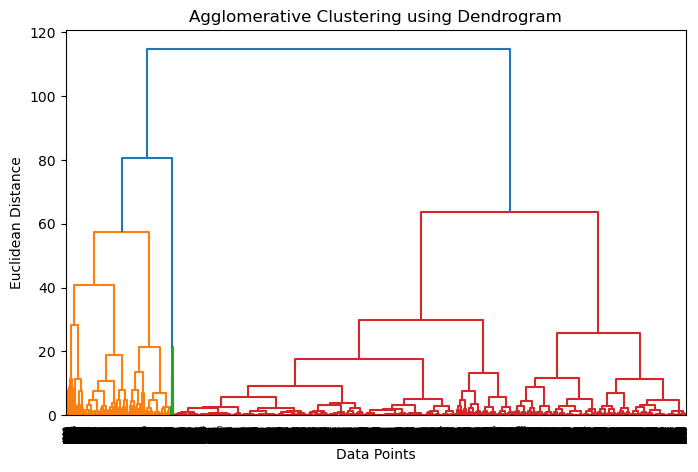

In [25]:
#Visualizing for the dendrogram
plt.figure(figsize=(8, 5))

dendrogram(linked,orientation='top', distance_sort='descending', show_leaf_counts= 'True')
plt.title('Agglomerative Clustering using Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [33]:
agglom_cluster = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

In [34]:
clusters =agglom_cluster.fit_predict(X_scaled)

In [35]:
credit_df['Clusters']= clusters

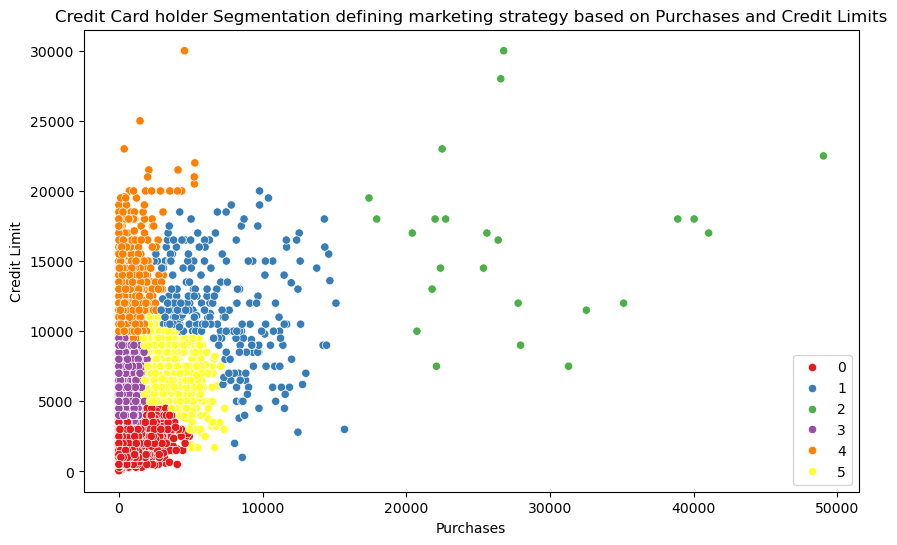

In [36]:
#Using a scatter plot to Visualize the data
plt.figure(figsize=(10,6))
sns.scatterplot(x=credit_df['PURCHASES'], y=credit_df['CREDIT_LIMIT'],hue=credit_df['Clusters'],palette='Set1')
plt.title('Credit Card holder Segmentation defining marketing strategy based on Purchases and Credit Limits')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()

## Kmeans Clustering

In [38]:
#importing kmeans clustering
from sklearn.cluster import KMeans

In [39]:
inertia =[]

for i in range(1,11): #Looping the cluster numbers from 1 to 10
    kmeans =KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)  #Fit the KMeans model on the Standardized data
    inertia.append(kmeans.inertia_)  #Appending the inertia(sum of squared distance)to the list

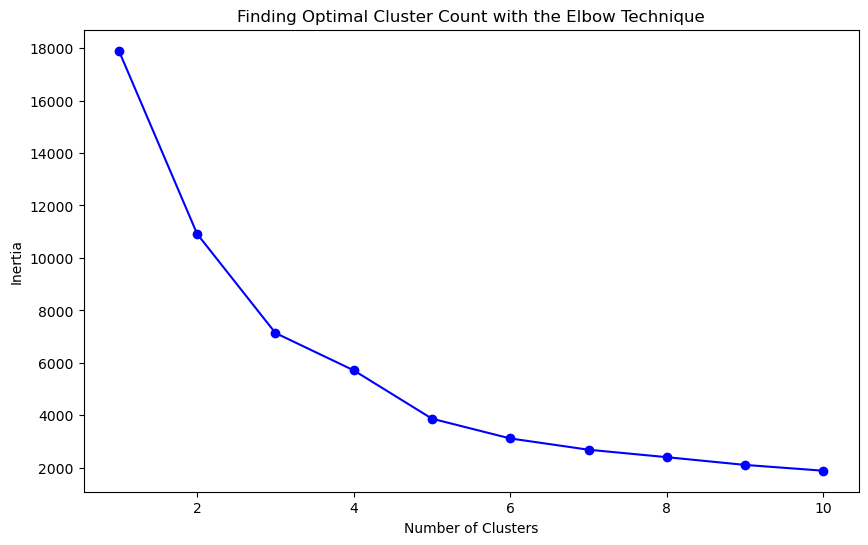

In [43]:
#plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1,11), inertia, 'bo-')
# 'b': Speciifies the color of the plot, b stands for blue.
# 'o': Specifies the marker style, the circle.
# '-': Specifies the line style, which in this case is a solid line(-) 
plt.title('Finding Optimal Cluster Count with the Elbow Technique')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
#Fit K-means with 5 clusters
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

In [46]:
credit_df['Cluster'] = kmeans.labels_

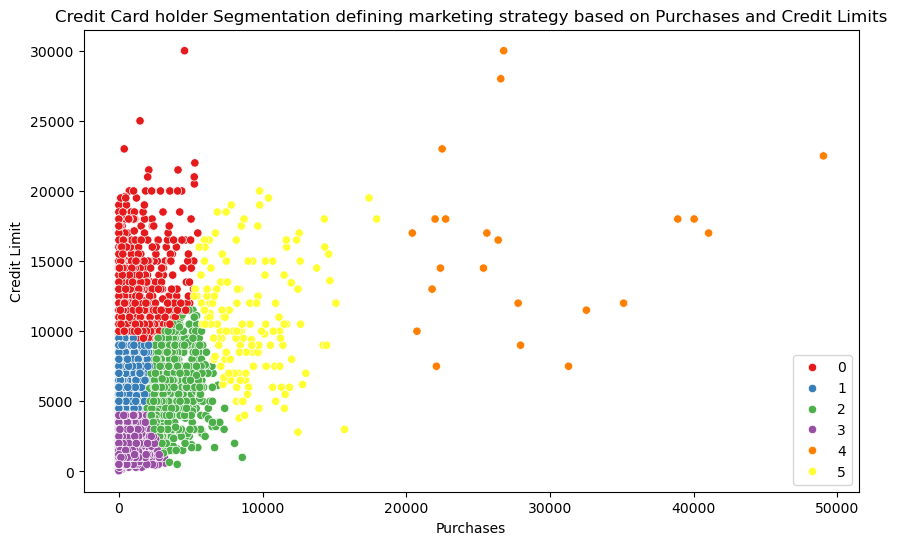

In [47]:
#Using a scatterplot to Visuaize the Clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=credit_df['PURCHASES'],y=credit_df['CREDIT_LIMIT'],hue=credit_df['Cluster'],palette='Set1')
plt.title('Credit Card holder Segmentation defining marketing strategy based on Purchases and Credit Limits')
plt.xlabel('Purchases')
plt.ylabel('Credit Limit')
plt.legend()
plt.show()